In [1]:
import pandas as pd
import math
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("course_reviews.csv")
df.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.0,2021-02-05 07:45:55,2021-01-25 15:12:08,5.0,0.0,0.0
1,5.0,2021-02-04 21:05:32,2021-02-04 20:43:40,1.0,0.0,0.0
2,4.5,2021-02-04 20:34:03,2019-07-04 23:23:27,1.0,0.0,0.0
3,5.0,2021-02-04 16:56:28,2021-02-04 14:41:29,10.0,0.0,0.0
4,4.0,2021-02-04 15:00:24,2020-10-13 03:10:07,10.0,0.0,0.0


In [2]:
df[["Timestamp","Enrolled"]] = df[["Timestamp","Enrolled"]].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rating              4323 non-null   float64       
 1   Timestamp           4323 non-null   datetime64[ns]
 2   Enrolled            4323 non-null   datetime64[ns]
 3   Progress            4323 non-null   float64       
 4   Questions Asked     4323 non-null   float64       
 5   Questions Answered  4323 non-null   float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 202.8 KB


In [3]:
df[["Timestamp","Enrolled"]].max()

Timestamp   2021-02-05 07:45:55
Enrolled    2021-02-04 20:43:40
dtype: datetime64[ns]

In [4]:
df["Rating"].value_counts()

Rating
5.0    3267
4.5     475
4.0     383
3.5      96
3.0      62
1.0      15
2.0      12
2.5      11
1.5       2
Name: count, dtype: int64

In [5]:
df["Questions Asked"].value_counts()

Questions Asked
0.0     3867
1.0      276
2.0       80
3.0       43
4.0       15
5.0       13
6.0        9
8.0        5
9.0        3
14.0       2
11.0       2
7.0        2
10.0       2
15.0       2
22.0       1
12.0       1
Name: count, dtype: int64

In [6]:
df.groupby("Questions Asked")["Rating"].agg(["count","mean"])

,count,mean
Questions Asked,,
0.0,3867,4.765193
1.0,276,4.740942
2.0,80,4.806250
3.0,43,4.744186
4.0,15,4.833333
5.0,13,4.653846
6.0,9,5.000000
7.0,2,4.750000
8.0,5,4.900000


In [7]:
df["Rating"].mean()

4.764284061993986

In [8]:
df

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.0,2021-02-05 07:45:55,2021-01-25 15:12:08,5.0,0.0,0.0
1,5.0,2021-02-04 21:05:32,2021-02-04 20:43:40,1.0,0.0,0.0
2,4.5,2021-02-04 20:34:03,2019-07-04 23:23:27,1.0,0.0,0.0
3,5.0,2021-02-04 16:56:28,2021-02-04 14:41:29,10.0,0.0,0.0
4,4.0,2021-02-04 15:00:24,2020-10-13 03:10:07,10.0,0.0,0.0
...,...,...,...,...,...,...
4318,5.0,2019-05-17 09:51:44,2019-05-17 09:08:53,34.0,1.0,0.0
4319,5.0,2019-05-16 21:27:05,2019-05-16 20:32:15,5.0,0.0,0.0
4320,5.0,2019-05-16 20:22:26,2019-05-16 20:21:19,1.0,0.0,0.0
4321,5.0,2019-05-16 19:49:07,2019-05-16 19:47:29,1.0,0.0,0.0


In [9]:
df["days"] = (df["Timestamp"].max() - df["Timestamp"]).dt.days
df

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered,days
0,5.0,2021-02-05 07:45:55,2021-01-25 15:12:08,5.0,0.0,0.0,0
1,5.0,2021-02-04 21:05:32,2021-02-04 20:43:40,1.0,0.0,0.0,0
2,4.5,2021-02-04 20:34:03,2019-07-04 23:23:27,1.0,0.0,0.0,0
3,5.0,2021-02-04 16:56:28,2021-02-04 14:41:29,10.0,0.0,0.0,0
4,4.0,2021-02-04 15:00:24,2020-10-13 03:10:07,10.0,0.0,0.0,0
...,...,...,...,...,...,...,...
4318,5.0,2019-05-17 09:51:44,2019-05-17 09:08:53,34.0,1.0,0.0,629
4319,5.0,2019-05-16 21:27:05,2019-05-16 20:32:15,5.0,0.0,0.0,630
4320,5.0,2019-05-16 20:22:26,2019-05-16 20:21:19,1.0,0.0,0.0,630
4321,5.0,2019-05-16 19:49:07,2019-05-16 19:47:29,1.0,0.0,0.0,630


In [10]:
df.loc[df["days"]<=30,"Rating"].mean()

4.753191489361702

In [11]:
df.loc[(df["days"]>30) & (df["days"]<=90),"Rating"].mean()

4.776892430278885

In [12]:
df.loc[(df["days"]>90) & (df["days"]<=180),"Rating"].mean()

4.747887323943662

In [13]:
df.loc[(df["days"]>180),"Rating"].mean()

4.767037552155772

In [14]:
df.loc[df["days"]<=30,"Rating"].mean() *28/100 + \
    df.loc[(df["days"]>30) & (df["days"]<=90),"Rating"].mean() * 26/100 + \
    df.loc[(df["days"]>90) & (df["days"]<=180),"Rating"].mean() * 24/100 + \
    df.loc[(df["days"]>180),"Rating"].mean() *22/100

4.761126868114535

In [15]:
def time_based_weighted_average(df,w1=28,w2=26,w3=24,w4=22):
    return   df.loc[df["days"]<=30,"Rating"].mean() *w1/100 + \
        df.loc[(df["days"]>30) & (df["days"]<=90),"Rating"].mean() * w2/100 + \
        df.loc[(df["days"]>90) & (df["days"]<=180),"Rating"].mean() * w3/100 + \
        df.loc[(df["days"]>180),"Rating"].mean() *w4/100
        
time_based_weighted_average(df,30,26,22,22)

4.761232951422896

In [16]:
df

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered,days
0,5.0,2021-02-05 07:45:55,2021-01-25 15:12:08,5.0,0.0,0.0,0
1,5.0,2021-02-04 21:05:32,2021-02-04 20:43:40,1.0,0.0,0.0,0
2,4.5,2021-02-04 20:34:03,2019-07-04 23:23:27,1.0,0.0,0.0,0
3,5.0,2021-02-04 16:56:28,2021-02-04 14:41:29,10.0,0.0,0.0,0
4,4.0,2021-02-04 15:00:24,2020-10-13 03:10:07,10.0,0.0,0.0,0
...,...,...,...,...,...,...,...
4318,5.0,2019-05-17 09:51:44,2019-05-17 09:08:53,34.0,1.0,0.0,629
4319,5.0,2019-05-16 21:27:05,2019-05-16 20:32:15,5.0,0.0,0.0,630
4320,5.0,2019-05-16 20:22:26,2019-05-16 20:21:19,1.0,0.0,0.0,630
4321,5.0,2019-05-16 19:49:07,2019-05-16 19:47:29,1.0,0.0,0.0,630


In [17]:
df.groupby("Progress").agg({"Rating":["count","mean"]})

Rating          
          count      mean
Progress                 
0.0          69  4.673913
1.0         431  4.642691
2.0          84  4.654762
3.0         107  4.663551
4.0         247  4.777328
...         ...       ...
94.0          1  5.000000
95.0         17  4.794118
97.0          4  5.000000
98.0          2  5.000000
100.0       288  4.866319

[91 rows x 2 columns]

In [18]:
df.loc[df["Progress"]<=10,"Rating"].mean() * 10/100 + \
    df.loc[(df["Progress"]>10) & (df["Progress"]<=45),"Rating"].mean()* 25/100 + \
    df.loc[(df["Progress"]>45) & (df["Progress"]<=75),"Rating"].mean()* 30/100 + \
    df.loc[df["Progress"]>75,"Rating"].mean() * 35/100 

4.816244166577737

In [19]:
def user_based_weighted_average(df,w1=10,w2=25,w3=30,w4=35):
    return df.loc[df["Progress"]<=10,"Rating"].mean() * w1/100 + \
    df.loc[(df["Progress"]>10) & (df["Progress"]<=45),"Rating"].mean()* w2/100 + \
    df.loc[(df["Progress"]>45) & (df["Progress"]<=75),"Rating"].mean()* w3/100 + \
    df.loc[df["Progress"]>75,"Rating"].mean() * w4/100 
    
user_based_weighted_average(df)

4.816244166577737

In [20]:
def course_weighted_rating(df,time_w=.5,user_w=.5):
    return time_based_weighted_average(df) * time_w + user_based_weighted_average(df)*user_w

course_weighted_rating(df)

4.788685517346136

In [21]:
df = pd.read_csv("product_sorting.csv")
from sklearn.preprocessing import MinMaxScaler
df.head()

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.8,4621,3466,924,185,46,6
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.6,4488,2962,1122,314,45,45
2,5 Saatte Veri Bilimci Olun (Valla Billa),Instructor_1,18693,4.4,2362,1582,567,165,24,24
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,6626,4.6,1027,688,257,51,10,21
4,(2020) Python ile Makine Öğrenmesi (Machine Le...,Veri Bilimi Okulu,11314,4.6,969,717,194,38,10,10


<Axes: >

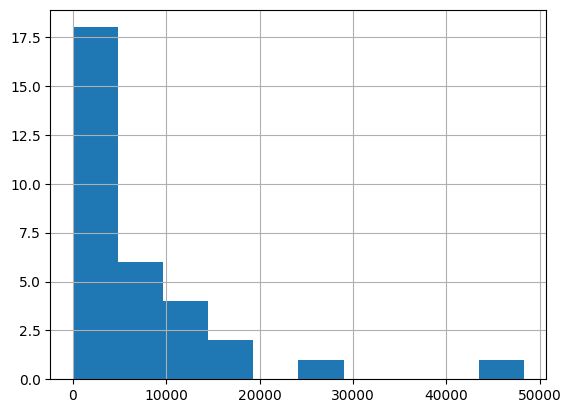

In [22]:
df["purchase_count"].hist()

array([[<Axes: title={'center': 'purchase_count'}>]], dtype=object)

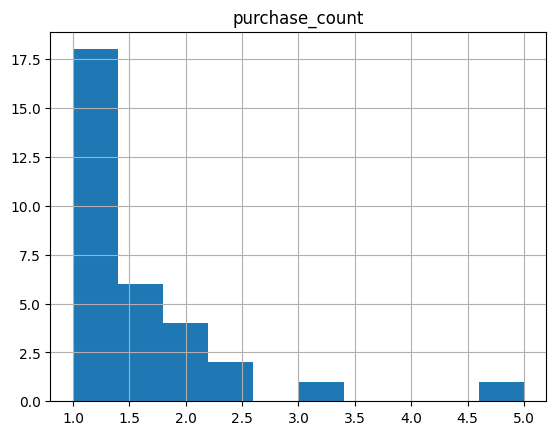

In [23]:
sc = MinMaxScaler(feature_range=(1,5)).set_output(transform="pandas")
sc.fit_transform(df[["purchase_count"]]).hist()

<Axes: >

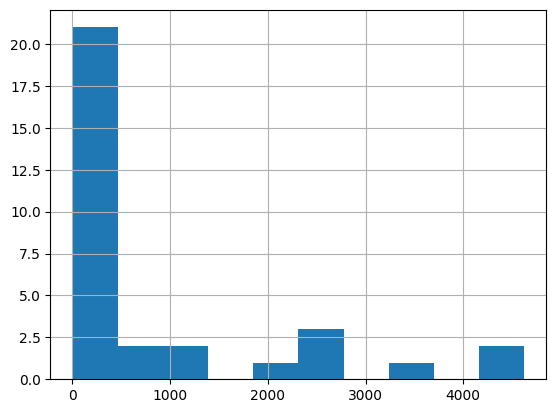

In [24]:
df["commment_count"].hist()

array([[<Axes: title={'center': 'commment_count'}>]], dtype=object)

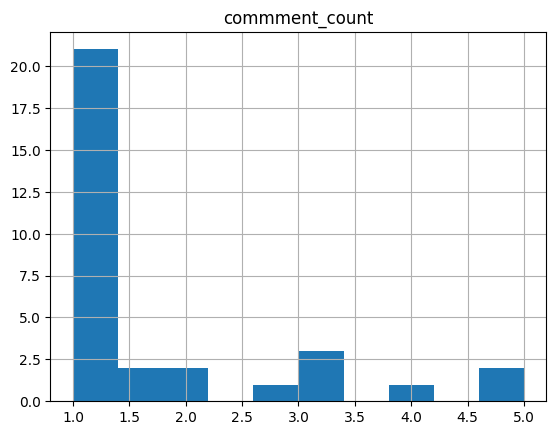

In [25]:
sc = MinMaxScaler(feature_range=(1,5)).set_output(transform="pandas")
sc.fit_transform(df[["commment_count"]]).hist()

In [26]:
from feature_engine.transformation import YeoJohnsonTransformer
yeo = YeoJohnsonTransformer(variables=["commment_count","purchase_count"])
df= yeo.fit_transform(df)

array([[<Axes: title={'center': 'commment_count'}>]], dtype=object)

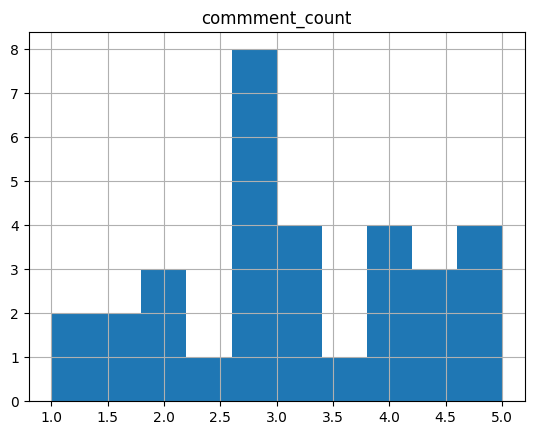

In [27]:
sc = MinMaxScaler(feature_range=(1,5)).set_output(transform="pandas")
sc.fit_transform(df[["commment_count"]]).hist()

In [28]:
df["purchase_count_scaled"] = sc.fit_transform(df[["purchase_count"]])
df["commment_count_scaled"] = sc.fit_transform(df[["commment_count"]])

<Axes: >

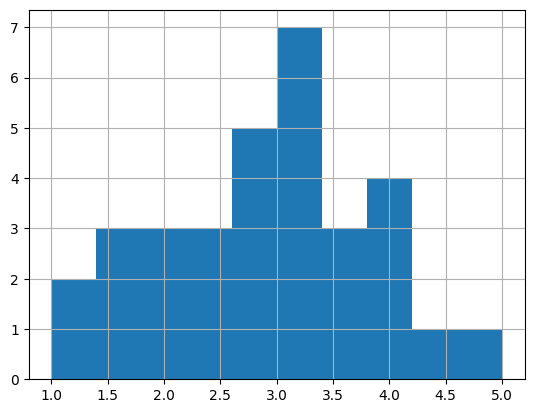

In [29]:
df["purchase_count_scaled"].hist()

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
purchase_count,32.0,18.114591,6.816839,4.733222,13.133757,18.571020,23.294529,32.660245
rating,32.0,4.356250,0.447889,3.100000,4.275000,4.500000,4.625000,4.800000
commment_count,32.0,5.293340,1.663867,2.051815,4.347677,5.095897,6.594508,7.995758
5_point,32.0,598.093750,920.140114,1.000000,49.250000,112.500000,695.250000,3466.000000
4_point,32.0,211.531250,312.262915,2.000000,19.750000,45.500000,253.250000,1122.000000
3_point,32.0,54.125000,76.576232,0.000000,6.750000,14.500000,56.250000,314.000000
2_point,32.0,9.531250,12.991273,0.000000,0.750000,3.000000,10.500000,46.000000
1_point,32.0,8.968750,14.570151,0.000000,2.000000,3.000000,9.000000,67.000000
purchase_count_scaled,32.0,2.916619,0.976379,1.000000,2.203212,2.981994,3.658544,5.000000
commment_count_scaled,32.0,3.181397,1.119706,1.000000,2.545009,3.048527,4.057023,5.000000


In [31]:
df["commment_count_scaled"] *32/100 + \
    df["purchase_count_scaled"] * 26/100 + \
    df["rating"] * 42/100

0     4.679066
1     4.826360
2     4.396420
3     4.114555
4     4.203077
5     3.823465
6     3.997694
7     3.359942
8     3.853050
9     4.002379
10    4.420840
11    3.973377
12    3.590361
13    3.750046
14    4.450560
15    4.336236
16    2.832317
17    3.153409
18    3.086111
19    3.782223
20    4.431374
21    3.335455
22    3.543591
23    2.694657
24    2.539433
25    2.501522
26    3.495428
27    3.380344
28    3.430622
29    2.713913
30    1.924000
31    2.769956
dtype: float64

In [32]:
def weighted_sorting_score(df,w1=32,w2=26,w3=42):
    return  df["commment_count_scaled"] *w1/100 + \
            df["purchase_count_scaled"] * w2/100 + \
            df["rating"] * w3/100
            
weighted_sorting_score(df)

0     4.679066
1     4.826360
2     4.396420
3     4.114555
4     4.203077
5     3.823465
6     3.997694
7     3.359942
8     3.853050
9     4.002379
10    4.420840
11    3.973377
12    3.590361
13    3.750046
14    4.450560
15    4.336236
16    2.832317
17    3.153409
18    3.086111
19    3.782223
20    4.431374
21    3.335455
22    3.543591
23    2.694657
24    2.539433
25    2.501522
26    3.495428
27    3.380344
28    3.430622
29    2.713913
30    1.924000
31    2.769956
dtype: float64

In [33]:
df["weighted_sorting_score"] = weighted_sorting_score(df)

In [34]:
df.sort_values("weighted_sorting_score",ascending=False).head(10)

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point,purchase_count_scaled,commment_count_scaled,weighted_sorting_score
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,32.660245,4.6,7.969566,2962,1122,314,45,45,5.000000,4.982374,4.826360
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,26.297881,4.8,7.995758,3466,924,185,46,6,4.088716,5.000000,4.679066
14,Uçtan Uca SQL Server Eğitimi,Veri Bilimi Okulu,24.646756,4.7,7.415212,1722,510,145,24,24,3.852224,4.609319,4.450560
20,Course_9,Instructor_3,24.668848,4.5,7.712366,2191,877,203,33,67,3.855389,4.809290,4.431374
10,İleri Düzey Excel|Dashboard|Excel İp Uçları,Veri Bilimi Okulu,23.075515,4.8,7.353879,1654,499,91,22,0,3.627175,4.568045,4.420840
2,5 Saatte Veri Bilimci Olun (Valla Billa),Instructor_1,26.714027,4.4,7.391411,1582,567,165,24,24,4.148321,4.593302,4.396420
15,Uygulamalarla SQL Öğreniyorum,Veri Bilimi Okulu,23.990040,4.5,7.387959,1435,705,165,24,24,3.758163,4.590979,4.336236
4,(2020) Python ile Makine Öğrenmesi (Machine Le...,Veri Bilimi Okulu,23.951572,4.6,6.581226,717,194,38,10,10,3.752653,4.048085,4.203077
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,21.267281,4.6,6.634353,688,257,51,10,21,3.368181,4.083837,4.114555
9,Modern R Programlama Eğitimi,Veri Bilimi Okulu,21.202693,4.4,6.514680,559,252,72,9,9,3.358930,4.003303,4.002379


In [35]:
df.loc[df["course_name"].str.contains("Veri Bilimi")].sort_values("weighted_sorting_score",ascending=False).head(10)

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point,purchase_count_scaled,commment_count_scaled,weighted_sorting_score
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,32.660245,4.6,7.969566,2962,1122,314,45,45,5.000000,4.982374,4.826360
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,26.297881,4.8,7.995758,3466,924,185,46,6,4.088716,5.000000,4.679066
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,21.267281,4.6,6.634353,688,257,51,10,21,3.368181,4.083837,4.114555
7,Veri Bilimi için İstatistik: Python ile İstati...,Veri Bilimi Okulu,13.340252,4.5,4.696021,88,26,9,0,3,2.232789,2.779429,3.359942


In [36]:
import math
import scipy.stats as st
def bayesian_average_rating(n, confidence=0.95):
    if sum(n) == 0:
        return 0
    K = len(n)
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    N = sum(n)
    first_part = 0.0
    second_part = 0.0
    for k, n_k in enumerate(n):
        first_part += (k + 1) * (n[k] + 1) / (N + K)
        second_part += (k + 1) * (k + 1) * (n[k] + 1) / (N + K)
    score = first_part - z * math.sqrt((second_part - first_part * first_part) / (N + K + 1))
    return score

In [37]:
a = pd.Series([5,0,0,0,50]);a

0     5
1     0
2     0
3     0
4    50
dtype: int64

In [38]:
bayesian_average_rating(a)

4.184231102367561

In [39]:
bayesian_average_rating([5,0,0,0,50])

4.184231102367561

In [40]:
bayesian_average_rating([10,0,0,0,0])

1.0555405232862347

In [41]:
bayesian_average_rating(pd.Series([10,0,0,0,0]))

1.0555405232862347

In [42]:
df.apply(lambda x: bayesian_average_rating(x[["1_point","2_point","3_point","4_point","5_point"]]), axis=1).head()

0    4.665857
1    4.516038
2    4.515210
3    4.482079
4    4.595674
dtype: float64

In [43]:
df.apply(lambda x: bayesian_average_rating([x["1_point"],x["2_point"],x["3_point"],x["4_point"],x["5_point"]]), axis=1).head()

0    4.665857
1    4.516038
2    4.515210
3    4.482079
4    4.595674
dtype: float64

In [44]:
df.apply(lambda x: print(x[["1_point","2_point","3_point","4_point","5_point"]]), axis=1)

1_point       6
2_point      46
3_point     185
4_point     924
5_point    3466
Name: 0, dtype: object
1_point      45
2_point      45
3_point     314
4_point    1122
5_point    2962
Name: 1, dtype: object
1_point      24
2_point      24
3_point     165
4_point     567
5_point    1582
Name: 2, dtype: object
1_point     21
2_point     10
3_point     51
4_point    257
5_point    688
Name: 3, dtype: object
1_point     10
2_point     10
3_point     38
4_point    194
5_point    717
Name: 4, dtype: object
1_point      0
2_point      0
3_point      4
4_point     45
5_point    164
Name: 5, dtype: object
1_point      9
2_point      9
3_point     51
4_point    205
5_point    582
Name: 6, dtype: object
1_point     3
2_point     0
3_point     9
4_point    26
5_point    88
Name: 7, dtype: object
1_point      4
2_point      2
3_point     13
4_point     41
5_point    154
Name: 8, dtype: object
1_point      9
2_point      9
3_point     72
4_point    252
5_point    559
Name: 9, dtype: object
1_point   

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
dtype: object

In [45]:
def func(n, i):
    return {i: n}

df.apply(lambda x: func([x["1_point"], x["2_point"],x["3_point"],x["4_point"],x["5_point"]], x.name), axis=1)

0       {0: [6, 46, 185, 924, 3466]}
1     {1: [45, 45, 314, 1122, 2962]}
2      {2: [24, 24, 165, 567, 1582]}
3        {3: [21, 10, 51, 257, 688]}
4        {4: [10, 10, 38, 194, 717]}
5            {5: [0, 0, 4, 45, 164]}
6          {6: [9, 9, 51, 205, 582]}
7             {7: [3, 0, 9, 26, 88]}
8           {8: [4, 2, 13, 41, 154]}
9          {9: [9, 9, 72, 252, 559]}
10      {10: [0, 22, 91, 499, 1654]}
11         {11: [5, 12, 51, 87, 95]}
12        {12: [3, 8, 34, 113, 218]}
13          {13: [3, 1, 12, 46, 82]}
14    {14: [24, 24, 145, 510, 1722]}
15    {15: [24, 24, 165, 705, 1435]}
16           {16: [0, 0, 0, 10, 10]}
17          {17: [2, 2, 11, 13, 38]}
18            {18: [0, 0, 6, 9, 22]}
19          {19: [0, 0, 4, 31, 200]}
20    {20: [67, 33, 203, 877, 2191]}
21           {21: [3, 3, 9, 47, 68]}
22         {22: [3, 2, 13, 29, 122]}
23             {23: [0, 0, 3, 3, 7]}
24             {24: [2, 1, 2, 7, 7]}
25           {25: [3, 3, 16, 11, 9]}
26         {26: [2, 3, 16, 52, 103]}
2

In [46]:
def func(n, index):
    return {index: n}

dct = df.apply(lambda x: func(x[["1_point","2_point","3_point","4_point","5_point"]], x.name), axis=1)
dct

0       {0: [6, 46, 185, 924, 3466]}
1     {1: [45, 45, 314, 1122, 2962]}
2      {2: [24, 24, 165, 567, 1582]}
3        {3: [21, 10, 51, 257, 688]}
4        {4: [10, 10, 38, 194, 717]}
5            {5: [0, 0, 4, 45, 164]}
6          {6: [9, 9, 51, 205, 582]}
7             {7: [3, 0, 9, 26, 88]}
8           {8: [4, 2, 13, 41, 154]}
9          {9: [9, 9, 72, 252, 559]}
10      {10: [0, 22, 91, 499, 1654]}
11         {11: [5, 12, 51, 87, 95]}
12        {12: [3, 8, 34, 113, 218]}
13          {13: [3, 1, 12, 46, 82]}
14    {14: [24, 24, 145, 510, 1722]}
15    {15: [24, 24, 165, 705, 1435]}
16           {16: [0, 0, 0, 10, 10]}
17          {17: [2, 2, 11, 13, 38]}
18            {18: [0, 0, 6, 9, 22]}
19          {19: [0, 0, 4, 31, 200]}
20    {20: [67, 33, 203, 877, 2191]}
21           {21: [3, 3, 9, 47, 68]}
22         {22: [3, 2, 13, 29, 122]}
23             {23: [0, 0, 3, 3, 7]}
24             {24: [2, 1, 2, 7, 7]}
25           {25: [3, 3, 16, 11, 9]}
26         {26: [2, 3, 16, 52, 103]}
2

In [47]:
bayesian_average_rating([5,0,5,0,200])

4.713266566226179

In [48]:
bayesian_average_rating([50,0,50,0,2000])

4.823525938314512

In [49]:
df["bar_score"] =df.apply(lambda x: bayesian_average_rating(x[["1_point","2_point","3_point","4_point","5_point"]]),axis=1)

In [50]:
df.sort_values(by="bar_score",ascending=False).head(10)

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point,purchase_count_scaled,commment_count_scaled,weighted_sorting_score,bar_score
19,Alıştırmalarla SQL Öğreniyorum,Veri Bilimi Okulu,17.943396,4.8,5.275832,200,31,4,0,0,2.892099,3.169615,3.782223,4.729128
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,26.297881,4.8,7.995758,3466,924,185,46,6,4.088716,5.000000,4.679066,4.665857
10,İleri Düzey Excel|Dashboard|Excel İp Uçları,Veri Bilimi Okulu,23.075515,4.8,7.353879,1654,499,91,22,0,3.627175,4.568045,4.420840,4.641679
5,Course_1,Instructor_2,19.578590,4.8,5.184575,164,45,4,0,0,3.126309,3.108203,3.823465,4.634477
4,(2020) Python ile Makine Öğrenmesi (Machine Le...,Veri Bilimi Okulu,23.951572,4.6,6.581226,717,194,38,10,10,3.752653,4.048085,4.203077,4.595674
14,Uçtan Uca SQL Server Eğitimi,Veri Bilimi Okulu,24.646756,4.7,7.415212,1722,510,145,24,24,3.852224,4.609319,4.450560,4.568162
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,32.660245,4.6,7.969566,2962,1122,314,45,45,5.000000,4.982374,4.826360,4.516038
2,5 Saatte Veri Bilimci Olun (Valla Billa),Instructor_1,26.714027,4.4,7.391411,1582,567,165,24,24,4.148321,4.593302,4.396420,4.515210
6,Course_2,Instructor_3,17.964602,4.7,6.467786,582,205,51,9,9,2.895136,3.971745,3.997694,4.507970
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,21.267281,4.6,6.634353,688,257,51,10,21,3.368181,4.083837,4.114555,4.482079


In [51]:
def hybrid_sorting_score(df,bar_w=0.6,wss_w=0.4):
    bar_score = df.apply(lambda x: bayesian_average_rating(x[["1_point","2_point","3_point","4_point","5_point"]]),axis=1)
    wss_score = weighted_sorting_score(df)
    
    return bar_score *bar_w + wss_score*wss_w

df["hybrid_sorting_score"]= hybrid_sorting_score(df)

In [52]:
df.sort_values(by="hybrid_sorting_score",ascending=False).head(15)

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point,purchase_count_scaled,commment_count_scaled,weighted_sorting_score,bar_score,hybrid_sorting_score
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,26.297881,4.8,7.995758,3466,924,185,46,6,4.088716,5.000000,4.679066,4.665857,4.671141
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,32.660245,4.6,7.969566,2962,1122,314,45,45,5.000000,4.982374,4.826360,4.516038,4.640167
10,İleri Düzey Excel|Dashboard|Excel İp Uçları,Veri Bilimi Okulu,23.075515,4.8,7.353879,1654,499,91,22,0,3.627175,4.568045,4.420840,4.641679,4.553343
14,Uçtan Uca SQL Server Eğitimi,Veri Bilimi Okulu,24.646756,4.7,7.415212,1722,510,145,24,24,3.852224,4.609319,4.450560,4.568162,4.521121
2,5 Saatte Veri Bilimci Olun (Valla Billa),Instructor_1,26.714027,4.4,7.391411,1582,567,165,24,24,4.148321,4.593302,4.396420,4.515210,4.467694
20,Course_9,Instructor_3,24.668848,4.5,7.712366,2191,877,203,33,67,3.855389,4.809290,4.431374,4.480627,4.460926
4,(2020) Python ile Makine Öğrenmesi (Machine Le...,Veri Bilimi Okulu,23.951572,4.6,6.581226,717,194,38,10,10,3.752653,4.048085,4.203077,4.595674,4.438635
15,Uygulamalarla SQL Öğreniyorum,Veri Bilimi Okulu,23.990040,4.5,7.387959,1435,705,165,24,24,3.758163,4.590979,4.336236,4.454811,4.407381
19,Alıştırmalarla SQL Öğreniyorum,Veri Bilimi Okulu,17.943396,4.8,5.275832,200,31,4,0,0,2.892099,3.169615,3.782223,4.729128,4.350366
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,21.267281,4.6,6.634353,688,257,51,10,21,3.368181,4.083837,4.114555,4.482079,4.335069


In [2]:
df = pd.read_csv("movies_metadata.csv",low_memory=False)
df = df[["title","vote_average","vote_count"]]
df.head()

,title,vote_average,vote_count
0,Toy Story,7.7,5415.0
1,Jumanji,6.9,2413.0
2,Grumpier Old Men,6.5,92.0
3,Waiting to Exhale,6.1,34.0
4,Father of the Bride Part II,5.7,173.0


In [3]:
df.sort_values(by="vote_average",ascending=False).head(10)

,title,vote_average,vote_count
21642,Ice Age Columbus: Who Were the First Americans?,10.0,1.0
15710,If God Is Willing and da Creek Don't Rise,10.0,1.0
22396,Meat the Truth,10.0,1.0
22395,Marvin Hamlisch: What He Did For Love,10.0,1.0
35343,Elaine Stritch: At Liberty,10.0,1.0
186,Reckless,10.0,1.0
45047,The Human Surge,10.0,1.0
22377,The Guide,10.0,1.0
22346,هیچ کجا هیچ کس,10.0,1.0
1634,Other Voices Other Rooms,10.0,1.0


In [4]:
df["vote_count"].describe([.1,.2,.5,.7,.80,.9,.95,.99])

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
10%          1.000000
20%          2.000000
50%         10.000000
70%         25.000000
80%         50.000000
90%        160.000000
95%        434.000000
99%       2183.820000
max      14075.000000
Name: vote_count, dtype: float64

In [5]:
df[df["vote_count"]>400].sort_values(by="vote_average",ascending=False)

,title,vote_average,vote_count
10309,Dilwale Dulhania Le Jayenge,9.1,661.0
40251,Your Name.,8.5,1030.0
834,The Godfather,8.5,6024.0
314,The Shawshank Redemption,8.5,8358.0
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0
...,...,...,...
1486,Speed 2: Cruise Control,4.1,439.0
28207,The Boy Next Door,4.1,1034.0
18101,Jack and Jill,4.0,619.0
21238,Sharknado,3.8,484.0


In [6]:
df.dropna(inplace=True)

<Axes: >

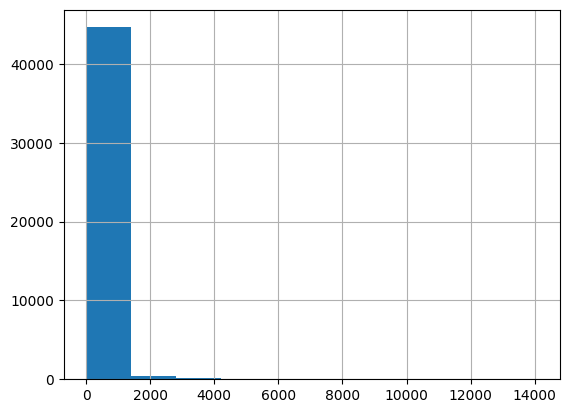

In [7]:
df["vote_count"].hist()

In [8]:
from sklearn.preprocessing import MinMaxScaler
df["vote_count_score"] = MinMaxScaler(feature_range=(1,10)).fit_transform(df[["vote_count"]])

In [9]:
df["scores"] = df["vote_average"] * df["vote_count_score"]
df.sort_values(by="scores",ascending=False).head(15)

,title,vote_average,vote_count,vote_count_score,scores
15480,Inception,8.1,14075.0,10.000000,81.000000
12481,The Dark Knight,8.3,12269.0,8.845187,73.415048
22879,Interstellar,8.1,11187.0,8.153321,66.041904
17818,The Avengers,7.4,12000.0,8.673179,64.181528
14551,Avatar,7.2,12114.0,8.746075,62.971737
26564,Deadpool,7.4,11444.0,8.317655,61.550650
2843,Fight Club,8.3,9678.0,7.188419,59.663879
20051,Django Unchained,7.8,10297.0,7.584227,59.156973
23753,Guardians of the Galaxy,7.9,10014.0,7.403268,58.485819
292,Pulp Fiction,8.3,8670.0,6.543872,54.314139


<Axes: >

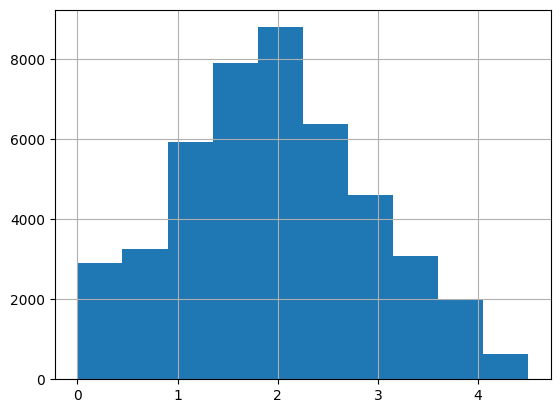

In [10]:
from feature_engine.transformation import YeoJohnsonTransformer
yeo= YeoJohnsonTransformer(variables="vote_count")
df = yeo.fit_transform(df)
df["vote_count"].hist()

In [12]:
df["vote_count_score"] = MinMaxScaler(feature_range=(1,10)).fit_transform(df[["vote_count"]])

In [13]:
df["scores"] = df["vote_average"] * df["vote_count_score"]
df.sort_values(by="scores",ascending=False).head(15)

,title,vote_average,vote_count,vote_count_score,scores
314,The Shawshank Redemption,8.5,4.408121,9.810879,83.392470
12481,The Dark Knight,8.3,4.478680,9.951911,82.600862
834,The Godfather,8.5,4.343871,9.682457,82.300880
2843,Fight Club,8.3,4.435663,9.865930,81.887221
292,Pulp Fiction,8.3,4.415074,9.824777,81.545652
15480,Inception,8.1,4.502739,10.000000,81.000000
351,Forrest Gump,8.2,4.403242,9.801127,80.369239
22879,Interstellar,8.1,4.462161,9.918893,80.343030
7000,The Lord of the Rings: The Return of the King,8.1,4.405086,9.804813,79.418983
1154,The Empire Strikes Back,8.2,4.342996,9.680708,79.381806


In [14]:
M = 250
C = df["vote_average"].mean()

def weighted_rating(r,v,M,C): 
    return (v/(v+M)*r) + (M/(v+M)*C)

df["weighted_rating"] = weighted_rating(df["vote_average"],df["vote_count"],M,C)

In [15]:
df.sort_values(by="weighted_rating",ascending=False).head(20)

,title,vote_average,vote_count,vote_count_score,scores,weighted_rating
10309,Dilwale Dulhania Le Jayenge,9.1,3.793205,8.581794,78.094326,5.670246
314,The Shawshank Redemption,8.5,4.408121,9.810879,83.392470,5.668140
834,The Godfather,8.5,4.343871,9.682457,82.300880,5.667425
12481,The Dark Knight,8.3,4.478680,9.951911,82.600862,5.665405
2843,Fight Club,8.3,4.435663,9.865930,81.887221,5.664960
292,Pulp Fiction,8.3,4.415074,9.824777,81.545652,5.664747
522,Schindler's List,8.3,4.280242,9.555276,79.308792,5.663349
23673,Whiplash,8.3,4.277326,9.549449,79.260424,5.663319
5481,Spirited Away,8.3,4.256157,9.507135,78.909219,5.663099
2211,Life Is Beautiful,8.3,4.237360,9.469564,78.597380,5.662905


In [16]:
import math
import scipy.stats as st
def bayesian_average_rating(n, confidence=0.95):
    if sum(n) == 0:
        return 0
    K = len(n)
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    N = sum(n)
    first_part = 0.0
    second_part = 0.0
    for k, n_k in enumerate(n):
        first_part += (k + 1) * (n[k] + 1) / (N + K)
        second_part += (k + 1) * (k + 1) * (n[k] + 1) / (N + K)
    score = first_part - z * math.sqrt((second_part - first_part * first_part) / (N + K + 1))
    return score

In [17]:
df = pd.read_csv("imdb_ratings.csv")
df=df.iloc[:,1:]
df

,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one
0,111161,1. The Shawshank Redemption (1994),9.2,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733
1,68646,2. The Godfather (1972),9.1,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128
2,71562,3. The Godfather: Part II (1974),9.0,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469
3,468569,4. The Dark Knight (2008),9.0,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345
4,50083,5. 12 Angry Men (1957),8.9,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1454029,246. La battaglia di Algeri (1966),8.0,73464,99692,144920,72405,21568,7507,3036,1657,1207,3567
246,58946,247. The Help (2011),8.0,11465,11483,14496,7704,2955,1469,589,420,379,2239
247,2991224,248. Mandariinid (2013),8.0,11968,8630,11245,5710,1550,558,210,125,130,401
248,169858,249. Trois couleurs: Rouge (1994),8.0,11972,8314,8828,4494,2043,1085,586,372,342,981


In [18]:
df["bar_score"] = df.apply(lambda x:bayesian_average_rating(x[["one","two","three","four","five","six","seven","eight","nine","ten"]]),axis=1)

In [19]:
df.sort_values(by="bar_score",ascending=False).head(12)

,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one,bar_score
0,111161,1. The Shawshank Redemption (1994),9.2,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733,9.145389
1,68646,2. The Godfather (1972),9.1,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128,8.940016
3,468569,4. The Dark Knight (2008),9.0,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345,8.895962
2,71562,3. The Godfather: Part II (1974),9.0,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469,8.812499
4,50083,5. 12 Angry Men (1957),8.9,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318,8.767934
6,167260,7. The Lord of the Rings: The Return of ...,8.9,703093,433087,270113,117411,44760,21818,10873,7987,6554,28990,8.752038
5,108052,6. Schindler's List (1993),8.9,453906,383584,220586,82367,27219,12922,6234,4572,4289,19328,8.743609
11,109830,12. Forrest Gump (1994),8.8,622104,553654,373644,151284,51140,22720,11692,7647,5941,12110,8.699152
12,1375666,13. Inception (2010),8.7,724798,627987,408686,174229,60668,26910,13436,8703,6932,17621,8.693148
10,137523,11. Fight Club (1999),8.8,637087,572654,371752,152295,53059,24755,12648,8606,6948,17435,8.674475


In [95]:
def up_down(up,down):
    if up+down == 0:
        return 0
    return up/(up+down)

up_down(600,400)

0.6

In [96]:
up_down(5500,4500)

0.55

In [25]:
def wilson_lower_bound(up, down, confidence=0.95):
    """
    Wilson Lower Bound Score hesapla

    - Bernoulli parametresi p için hesaplanacak güven aralığının alt sınırı WLB skoru olarak kabul edilir.
    - Hesaplanacak skor ürün sıralaması için kullanılır.
    - Not:
    Eğer skorlar 1-5 arasıdaysa 1-3 negatif, 4-5 pozitif olarak işaretlenir ve bernoulli'ye uygun hale getirilebilir.
    Bu beraberinde bazı problemleri de getirir. Bu sebeple bayesian average rating yapmak gerekir.

    Parameters
    ----------
    up: int
        up count
    down: int
        down count
    confidence: float
        confidence

    Returns
    -------
    wilson score: float

    """
    n = up + down
    if n == 0:
        return 0
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    phat = 1.0 * up / n
    return (phat + z * z / (2 * n) - z * math.sqrt((phat * (1 - phat) + z * z / (4 * n)) / n)) / (1 + z * z / n)

In [26]:
wilson_lower_bound(100,1)

0.9460328420055449

In [27]:
wilson_lower_bound(10,0)

0.7224672001371106

In [28]:
wilson_lower_bound(600,400)

0.5693094295142663

In [29]:
wilson_lower_bound(5500,4500)

0.5402319557715324

In [30]:
up = [15, 70, 14, 4, 2, 5, 8, 37, 21, 52, 28, 147, 61, 30, 23, 40, 37, 61, 54, 18, 12, 68]
down = [0, 2, 2, 2, 15, 2, 6, 5, 23, 8, 12, 2, 1, 1, 5, 1, 2, 6, 2, 0, 2, 2]
comments = pd.DataFrame({"up": up, "down": down})
comments

,up,down
0,15,0
1,70,2
2,14,2
3,4,2
4,2,15
5,5,2
6,8,6
7,37,5
8,21,23
9,52,8


In [31]:
def skor(x,y):
    return x*y

In [32]:
skor(comments["up"],comments["down"])

0       0
1     140
2      28
3       8
4      30
5      10
6      48
7     185
8     483
9     416
10    336
11    294
12     61
13     30
14    115
15     40
16     74
17    366
18    108
19      0
20     24
21    136
dtype: int64

In [33]:
comments.apply(lambda x:skor(x["up"],x["down"]),axis=1)

0       0
1     140
2      28
3       8
4      30
5      10
6      48
7     185
8     483
9     416
10    336
11    294
12     61
13     30
14    115
15     40
16     74
17    366
18    108
19      0
20     24
21    136
dtype: int64

In [34]:
comments["wlb"]= comments.apply(lambda x:wilson_lower_bound(x["up"],x["down"]),axis=1)
comments.sort_values(by="wlb",ascending=False)

,up,down,wlb
11,147,2,0.952384
12,61,1,0.914133
1,70,2,0.904258
21,68,2,0.901677
18,54,2,0.878812
15,40,1,0.874049
13,30,1,0.838059
16,37,2,0.831144
19,18,0,0.824121
17,61,6,0.818072
